# Spotify Most Streamed Songs of 2024 Analysis

## Importing Appropriate Libraries

In [22]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

## Loading in the Dataset

In [3]:
dataset = pd.read_csv("Most Streamed Spotify Songs 2024.csv", encoding = 'unicode_escape')
dataset

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


## Data Cleaning

### Checking for Missing Values

In [12]:
df_missing = pd.DataFrame(dataset.isnull().sum()).reset_index().rename(columns={'index': 'Track', 0: 'Missing Values'})
df_missing.drop(index=dataset.index[0], axis=0, inplace=True)
df_missing[df_missing['Missing Values']>0].sort_values(by='Missing Values', ascending=False)

,Track,Missing Values
27,TIDAL Popularity,4600
25,Soundcloud Streams,3333
19,SiriusXM Spins,2123
24,Pandora Track Stations,1268
13,TikTok Posts,1173
23,Pandora Streams,1106
22,Amazon Playlist Count,1055
16,YouTube Playlist Reach,1009
15,TikTok Views,981
14,TikTok Likes,980


In [13]:
dataset.drop('TIDAL Popularity', axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

### Verifying Data Types of Features and Converting to Correct Types

In [11]:
dataset['Spotify Playlist Count'].isnull().sum()

70

In [14]:
dataset['Spotify Playlist Count'] = dataset['Spotify Playlist Count'].fillna(0)
dataset['Spotify Playlist Count'].isnull().sum()

0

In [15]:
dataset['Spotify Playlist Count'] = dataset['Spotify Playlist Count'].apply(lambda x: str(x).replace(',', ''))
dataset['Spotify Playlist Count']

0        30716
1        28113
2        54331
3       269802
4         7223
         ...  
4595     65770
4596      4602
4597     72066
4598     14037
4599     32138
Name: Spotify Playlist Count, Length: 4600, dtype: object

In [17]:
dataset['Spotify Playlist Count'] = dataset['Spotify Playlist Count'].astype('int16')
dataset['Spotify Playlist Count'].dtype

dtype('int16')

### Identifying Duplicates and Keeping First Occurance Only If Present

In [18]:
data_duplicates = pd.DataFrame(dataset.duplicated()).rename(columns={0: 'duplicate'})
data_duplicates[data_duplicates['duplicate'] == True]

,duplicate
2450,True
3450,True


In [19]:
dataset.iloc[2449: 2451]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
2449,Tennessee Orange,Tennessee Orange,Megan Moroney,9/2/2022,TCAGJ2289254,"2,424",28.9,"227,893,586",28139,"12,480,714",...,"129,172",34,5.0,"1,370",49.0,"56,972,562","26,968","1,336,043","708,143",0
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,9/2/2022,TCAGJ2289254,"2,424",28.9,"227,893,586",28139,"12,480,714",...,"129,172",34,5.0,"1,370",49.0,"56,972,562","26,968","1,336,043","708,143",0


In [20]:
dataset.duplicated().sum()

2

### Identifying Outliers in "Track Score" and "Apple Music Playlist Count" Columns

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4600 non-null   int16  
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

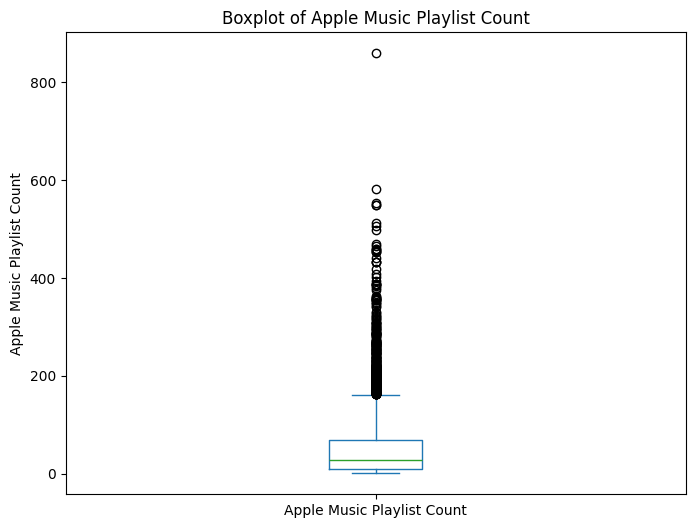

In [23]:
plt.figure(figsize=(8, 6))
dataset['Apple Music Playlist Count'].plot(kind='box')
plt.title('Boxplot of Apple Music Playlist Count')
plt.ylabel('Apple Music Playlist Count')
plt.show()

### Correcting the Data Formatting and Extracting Month and Year from the Date Column

In [24]:
dataset['Release Date'] = pd.to_datetime(dataset['Release Date'])

In [25]:
dataset['Release Month'] = dataset['Release Date'].dt.month
dataset['Release Date']

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
4595   2017-09-05
4596   2018-07-27
4597   2020-02-28
4598   2016-11-08
4599   2017-04-11
Name: Release Date, Length: 4600, dtype: datetime64[ns]

In [26]:
dataset['Release Month']

0        4
1        5
2        3
3        1
4        5
        ..
4595     9
4596     7
4597     2
4598    11
4599     4
Name: Release Month, Length: 4600, dtype: int32

In [27]:
dataset['Release Year'] = dataset['Release Date'].dt.year
dataset['Release Year']

0       2024
1       2024
2       2024
3       2023
4       2024
        ... 
4595    2017
4596    2018
4597    2020
4598    2016
4599    2017
Name: Release Year, Length: 4600, dtype: int32

### Numerical Univariate Analysis

In [28]:
dataset.describe()

,Release Date,Track Score,Spotify Playlist Count,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track,Release Month,Release Year
count,4600,4600.000000,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,4600.000000,4600.000000,4600.000000
mean,2021-01-27 07:48:18.782608896,41.844043,2824.197174,63.501581,54.60312,32.310954,25.348942,0.358913,6.046304,2020.616739
min,1987-07-21 00:00:00,19.400000,-32767.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1987.000000
25%,2019-07-16 18:00:00,23.300000,-6049.750000,61.000000,10.00000,5.000000,8.000000,0.000000,3.000000,2019.000000
50%,2022-06-01 00:00:00,29.900000,2854.000000,67.000000,28.00000,15.000000,17.000000,0.000000,6.000000,2022.000000
75%,2023-08-11 00:00:00,44.425000,14601.500000,73.000000,70.00000,37.000000,34.000000,1.000000,9.000000,2023.000000
max,2024-06-14 00:00:00,725.400000,32703.000000,96.000000,859.00000,632.000000,210.000000,1.000000,12.000000,2024.000000
std,NaN,38.543766,16419.474330,16.186438,71.61227,54.274538,25.989826,0.479734,3.419663,3.611707


In [30]:
per25 = np.percentile(dataset['Track Score'], 25)
per25

23.3

In [31]:
per75 = np.percentile(dataset['Track Score'], 75)
per75

44.425

In [32]:
iqr = per75 - per25

### Categorical Univariate Analysis

In [33]:
value_counts = dataset['Artist'].value_counts()

In [34]:
value_counts.head(20)

Artist
Drake             63
Taylor Swift      63
Bad Bunny         60
KAROL G           32
The Weeknd        31
Travis Scott      30
Billie Eilish     27
Ariana Grande     26
Future            23
Peso Pluma        22
Post Malone       22
Juice WRLD        21
Morgan Wallen     20
Olivia Rodrigo    20
Lil Baby          20
Doja Cat          19
Rauw Alejandro    19
Kendrick Lamar    18
Feid              17
Dua Lipa          17
Name: count, dtype: int64

In [4]:
figure1 =  px.scatter(dataset, x='Spotify Streams', y='Spotify Playlist Count', title='Spotify Streams vs. Playlist Count')

figure1.show()

In [5]:
figure2 = px.bar(dataset, x='Artist', y='Spotify Popularity', title='Spotify Popularity Sorted by Artist')
figure2.show()

In [6]:
df_sorted = dataset.sort_values(by='Spotify Popularity', ascending=False)

top_20_artists = df_sorted.head(20)

figure3 = px.bar(top_20_artists, x='Artist', y='Spotify Popularity', title='Top 20 Artists by Spotify Popularity')
figure3.show()

In [7]:
figure4 = px.scatter_matrix(dataset[['Spotify Popularity', 'Spotify Streams', 'YouTube Views']], title='Scatter Plot Matrix')
figure4.show()

In [8]:
figure5 = px.line_polar(dataset, r=['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%'],
                      theta=['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%'],
                      title='Radar Chart of Audio Features')
figure5.show()

In [9]:
figure6 = px.scatter_3d(dataset, x='Spotify Streams', y='YouTube Views', z='TikTok Views',
                      title='3D Scatter Plot of Spotify Streams, YouTube Views, and TikTok Views')

figure6.show()

In [10]:
figure7 = px.scatter(dataset, x='Spotify Popularity', y='Spotify Playlist Reach', color='Explicit Track',
                   title='Scatter Plot of Spotify Popularity vs Playlist Reach Colored by Explicit Track')
figure7.show()